# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [3]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
# plot_roc_curve

## Part 1: Gradient Descent

### Set Up

In [4]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [5]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


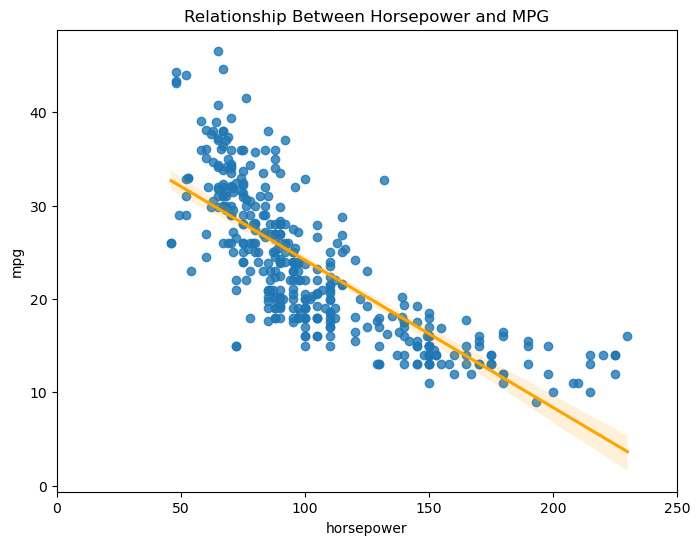

In [6]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- Showing us the error (RSS) on the y-axis and the slope of the model on the x-axis.
- The slope with the lowest error metric (RSS) is about -0.157.
- Gradient descent, tangent line of 0 at the optimal slope with minimum error.


### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- Step size is the hyper-parameter that we have control over.
- Step size captures the amount to change the coefficient as it tries to minimize the error term.
- Learning rate determines how large those steps are to start
- Small learning rate, small step size means it requires many steps to get to the optimal point
- Large learning rate, bigger step size means it takes less steps but it will overshoot.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- Logistic regression is a classification model.
- Predictions are classes based on predictive probabilities.
- Linear regression has one minimum in loss function, but log regression can have multiple. Log reg has logodds of predicted ys.
- Parametric because it gives out coefficients and it has its own assumptions.


Linear

- continuous numeric target variables
- linear

Log reg

- discrete numeric
- sigmoid function
- Classification
- needs preprocessing

Commonality between them
- both are parametric with assumptions
- Numeric inputs

Decision Tree

- non-parametric, no coefficients
- can be both regression and classification
- very interpretable visually
- but prone to overfitting
- no need for preprocessing


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- Compared to Decision Tree Classification model, it can have coefficients that can be interpreted after exponentiated.
- Decision Tree Classification model can be more useful for feature importance, which can help variable selection.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [7]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [8]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [61]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop("target", axis=1)
y = mpg_class.target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [62]:
# Scale the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

#### Part 1: explore the target column breakdown in train data

In [63]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- about 75% of "target" is classified as 0.



#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- The baseline would look like 25% of being classified as 1.
- Accuracy would be 75%


#### Part 3: How accurate would that baseline be on test data?


In [64]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- The test data would be 75.4% accurate, assuming it's just picking the majority, which is 0.


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

#### Answer:

- One problem is that the accuracy is not that great. Also, the test set did not perform as great as the train set.
- Imbalanced target --> SMOTE (synthetic minority oversampling technique) which is oversampling the minority or undersample the majority class, or set class_weight
- Strategy would be fitting a logistric regression model to better predict the classes for each data point.


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [65]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

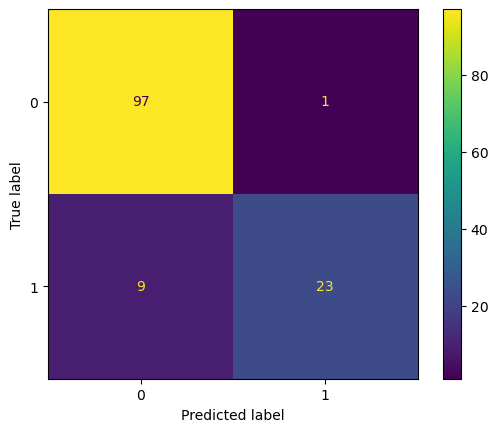

In [84]:
# Plot a confusion matrix on the test data
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# clf = SVC()
# clf.fit(X_test_scaled, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [69]:
# Accuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model_accuracy = accuracy_score(y_test, y_pred)
print(model_accuracy)

tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

accuracy = (tn + tp) / (tn + tp + fn + fp)
print(accuracy)

0.9230769230769231
0.9230769230769231


In [70]:
# Precision
model_precision = precision_score(y_test, y_pred)
print(model_precision)

precision = tp/(tp+fp)
print(precision)

0.9583333333333334
0.9583333333333334


In [71]:
# Recall
model_recall = recall_score(y_test, y_pred)
print(model_recall)

recall = tp/(tp+fn)
print(recall)

0.71875
0.71875


In [72]:
# F1-Score
model_f1 = f1_score(y_test, y_pred)
print(model_f1)

f1 = (2*tp)/(2*tp + fp + fn)
print(f1)

0.8214285714285714
0.8214285714285714


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [73]:
# Calculate roc-auc
y_prob = logreg.predict_proba(X_test_scaled)
y_hat = y_prob[:, 1]

roc_auc_score(y_test, y_hat)

0.9811862244897959

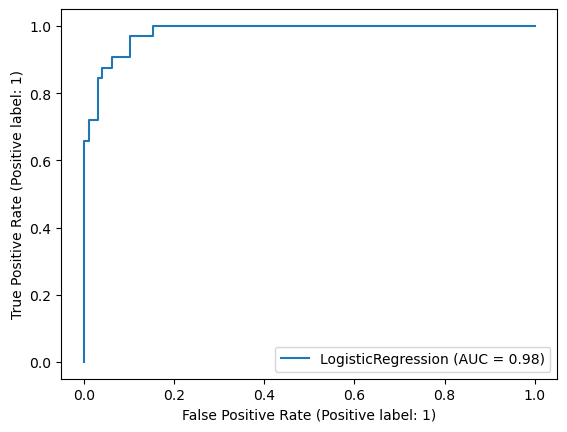

In [82]:
# Plot the ROC curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)
plt.show()

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

#### Answer:

- The AUC is very close to 1, as you can see in the ROC that is very close to the TPR of 1 and FPR of 0.
- It looks like the model is performing very well.


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [75]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

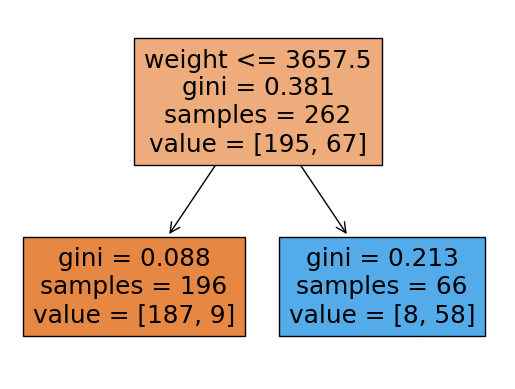

In [76]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

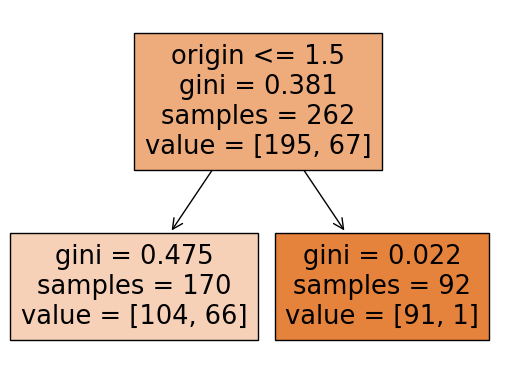

In [77]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

#### Answer:

- Although the version 2 has a leaf node with gini of 0.022 (lowest), the other leaf node has even higher gini than its parent gini.
- Version 1 has both leaf nodes with less gini. Not perfectly pure, but the gini decreased.
- So Version 1. Average of these two gini's is going to be lower


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [78]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

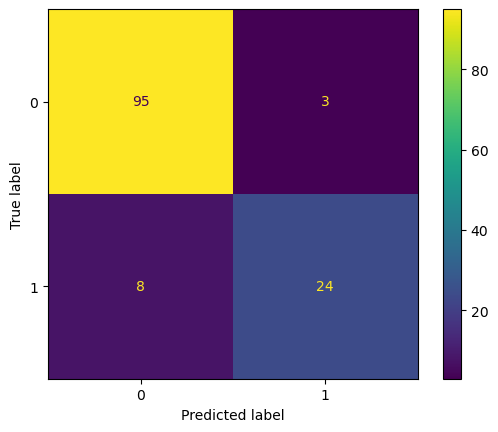

In [79]:
# Plot a confusion matrix on the test data
y_pred_dt = dt.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_dt)

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()
plt.show()

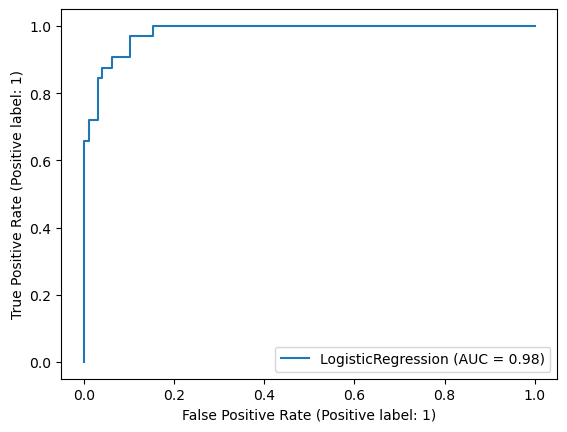

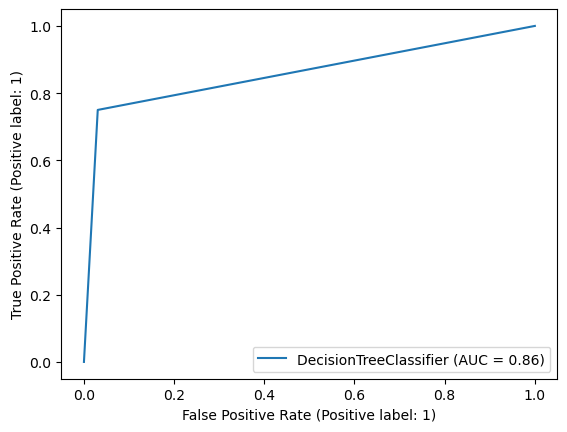

In [83]:
# Code to visualize the ROC curves for the models we've done
# fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test)
# RocCurveDisplay.from_predictions(y_test, y_pred_dt)
plt.show()


# plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
# plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

# plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
# plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

#### Answer:

- Log reg because the AUC is higher, closer to 1.
